# Decision Tree
$ \displaystyle Gini = 1-(prob\ yes)^2 -(prob\ no)^2$

$\displaystyle entropy = \sum -p_{i}.log2(p_{i})$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dt = pd.DataFrame({
    'sarjana': [0,0,0,1,1,1],
    'diterima':[0,0,1,0,1,0]
})
dt

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,0


In [3]:
giniS1True = 1 - (1/3)**2 - (2/3)**2
giniS1False = 1 - (1/3)**2 - (2/3)**2

giniS1True, giniS1False

(0.4444444444444444, 0.4444444444444444)

In [4]:
giniS1 = giniS1True*(3/6) + giniS1False*(3/6)
giniS1

0.4444444444444444

In [5]:
#coba pake sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier().fit(dt[['sarjana']],dt['diterima'])
dtree.predict([[1]]) #--> walaupun S1 tp gak diterima kerja

array([0], dtype=int64)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

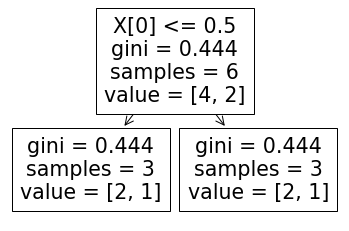

In [6]:
tree.plot_tree(dtree)

In [7]:
# value = [4,2] --> y/independet 0 =24, y/independet 1 = 2

In [8]:
#Export graphic tree
tree.export_graphviz(dtree, out_file = 'decision.dot', feature_names=['sarjana'],
                     class_names = ['Diterima', 'Ditolak'])

* render di : https://dreampuf.github.io/GraphvizOnline
* kemudian copy paste isi code file.dot(`decision.dot`), setelah di render bisa lgsg di download

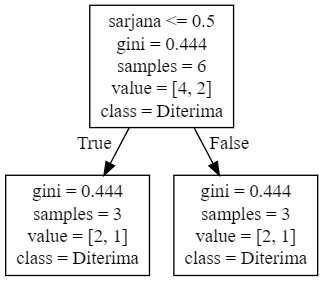

In [9]:
from IPython.display import Image

Image(filename='graphviz.png')

## Decision Tree Entropy

$\displaystyle Entropy = \sum -p_{i}.log2(p_{i})$

$\displaystyle Gain = Entropy(s) - \sum \frac {|S_v|}{|S|} Entropy\ S_v $


In [10]:
dt

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,0


In [11]:
# Hitung Entropy dari output `diterima`
EnAccTrue = -1 * (2/6) * np.log2(2/6)
EnAccFalse = -1 * (4/6) * np.log2(4/6)
TotalenAcc = EnAccTrue + EnAccFalse
# TotalenAcc

#Hitung Entropy sarjana True / diterima
EnS1TrueAccTrue = -1 * (1/3) * np.log2(1/3)
EnS1TrueAccFalse = -1 * (2/3) * np.log2(2/3)
TotalEnS1True = EnS1TrueAccTrue + EnS1TrueAccFalse
# TotalEnS1True

#Hitung Entropy sarjana False / diterima
EnS1FalseAccTrue = -1 * (1/3) * np.log2(1/3)
EnS1FalseAccFalse = -1 * (2/3) * np.log2(2/3)
TotalEnS1False = EnS1FalseAccTrue + EnS1FalseAccFalse
# TotalEnS1False

#Hitung weihted aveage antara s1 True dan s1 False
TotalEnS1 = (3/6)*TotalEnS1True + (3/6)*TotalEnS1False
# TotalEnS1

#Cari Gain
gain = TotalenAcc - TotalEnS1
gain

0.0

In [12]:
#Pakai sklearn
from sklearn import tree

dten = tree.DecisionTreeClassifier(criterion='entropy')
dten.fit(dt[['sarjana']], dt['diterima'])
dten.predict([[1]])

array([0], dtype=int64)

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]')]

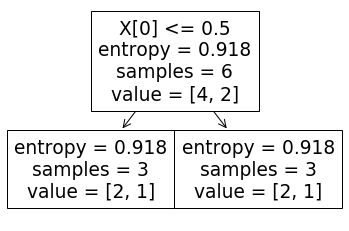

In [13]:
tree.plot_tree(dten.fit(dt[['sarjana']], dt['diterima']))

## Try another dataset

In [14]:
df_sarjana = pd.DataFrame({'sarjana':[0,1,0,0,1], 'sehat':[1,0,1,0,0], 'supel':[1,0,1,1,1], 'diterima':[1,1,0,0,0]})

In [15]:
df_sarjana

,sarjana,sehat,supel,diterima
0,0,1,1,1
1,1,0,0,1
2,0,1,1,0
3,0,0,1,0
4,1,0,1,0


## Gini

In [16]:
gini = DecisionTreeClassifier(criterion='gini')
gini.fit(df_sarjana[['sarjana','sehat','supel']],df_sarjana['diterima'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'), Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(267.84000000000003, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]


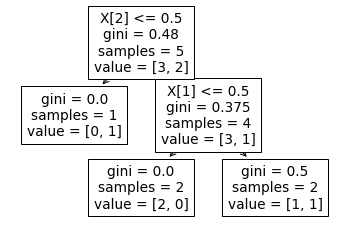

In [17]:
print(tree.plot_tree(gini.fit(df_sarjana[['sarjana','sehat','supel']],df_sarjana['diterima'])))

### Check Feature Importance for Gini

In [18]:
gini_importances = pd.DataFrame({'feature':df_sarjana.columns[:3], 'importance': gini.feature_importances_})
sorted_importances = gini_importances.sort_values('importance',ascending=False)
sorted_importances

,feature,importance
2,supel,0.642857
1,sehat,0.357143
0,sarjana,0.000000


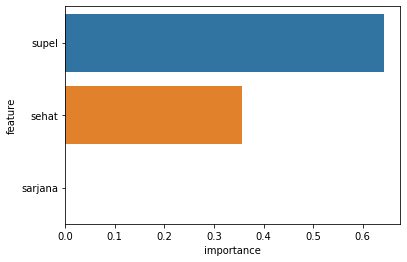

In [19]:
#horizontal barplot
sns.barplot(x='importance',y='feature',data=sorted_importances)

## Entropy

In [20]:
entropy = DecisionTreeClassifier(criterion='entropy')
entropy.fit(df_sarjana[['sarjana','sehat','supel']], df_sarjana['diterima'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'), Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(200.88000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'), Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(267.84000000000003, 36.23999999999998, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]')]


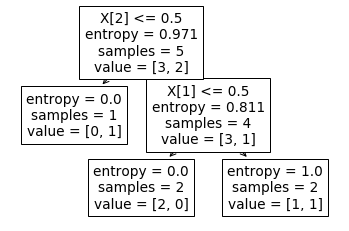

In [21]:
print(tree.plot_tree(entropy.fit(df_sarjana[['sarjana','sehat','supel']],df_sarjana['diterima'])))

In [22]:
entropy_importances = pd.DataFrame({'feature':df_sarjana.columns[:3], 'importance': entropy.feature_importances_})
sorted_importances = entropy_importances.sort_values('importance',ascending=False)
sorted_importances

,feature,importance
2,supel,0.563846
1,sehat,0.436154
0,sarjana,0.000000


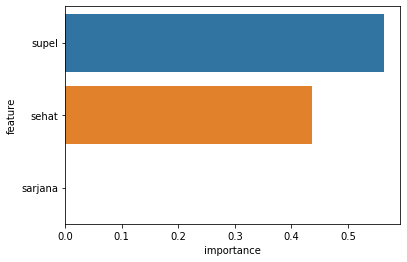

In [23]:
sns.barplot(x='importance',y='feature',data=sorted_importances)

# KYPHOSIS

In [24]:
kypho = pd.read_csv('kyphosis.csv')
kypho.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [25]:
#ganti  kyphosis dgn binary.apply
kypho['Kyphosis'] = kypho['Kyphosis'].apply(lambda x: 0  if x =='absent' else 1)

In [26]:
kypho

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


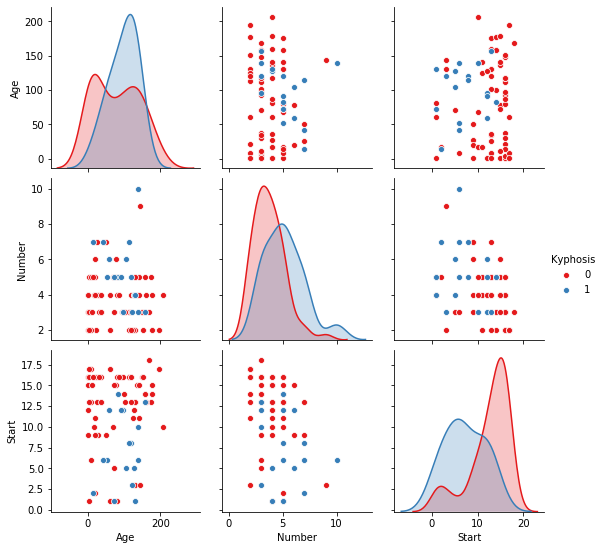

In [27]:
sns.pairplot(kypho, hue='Kyphosis',palette='Set1')

In [28]:
kypho

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [29]:
from sklearn.model_selection import train_test_split
X = kypho.drop('Kyphosis',axis=1)
y = kypho['Kyphosis']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=101)

In [30]:
y_train.value_counts() #gak imbang nih

0    47
1     9
Name: Kyphosis, dtype: int64

In [31]:
# Train use Entropy
dt_entro = DecisionTreeClassifier(criterion='entropy')
dt_entro.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
# Train use Gini Impuritues
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predict & Evaluation


In [33]:
# Entropy
entro_pred = dt_entro.predict(X_test)
entro_prob = dt_entro.predict_proba(X_test)

In [34]:
entro_prob

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [35]:
# GINI
gini_pred = dt_gini.predict(X_test)
gini_prob = dt_gini.predict_proba(X_test)

In [36]:
gini_prob

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [37]:
# memprediksi sesorang sakit kyphosis atau tidak --> lihat skor metricsnya

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc

In [39]:
# score pred using entro
print(classification_report(y_test,entro_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [40]:
print(confusion_matrix(y_test, entro_pred))

[[16  1]
 [ 6  2]]


In [41]:
# score pred using gini
print(classification_report(y_test,gini_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [42]:
print(confusion_matrix(y_test, gini_pred))

[[13  4]
 [ 6  2]]


Score Gini dan Entropy masih jelek karena belum dilakukan resampling train data set. karena dataset train diatas tidak imbang

## Tree Viz Entropy

In [43]:
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

In [44]:
export_graphviz(dt_entro, out_file='entro_kypho.dot',
               filled=True, rounded=True, feature_names = X.columns, special_characters=True)

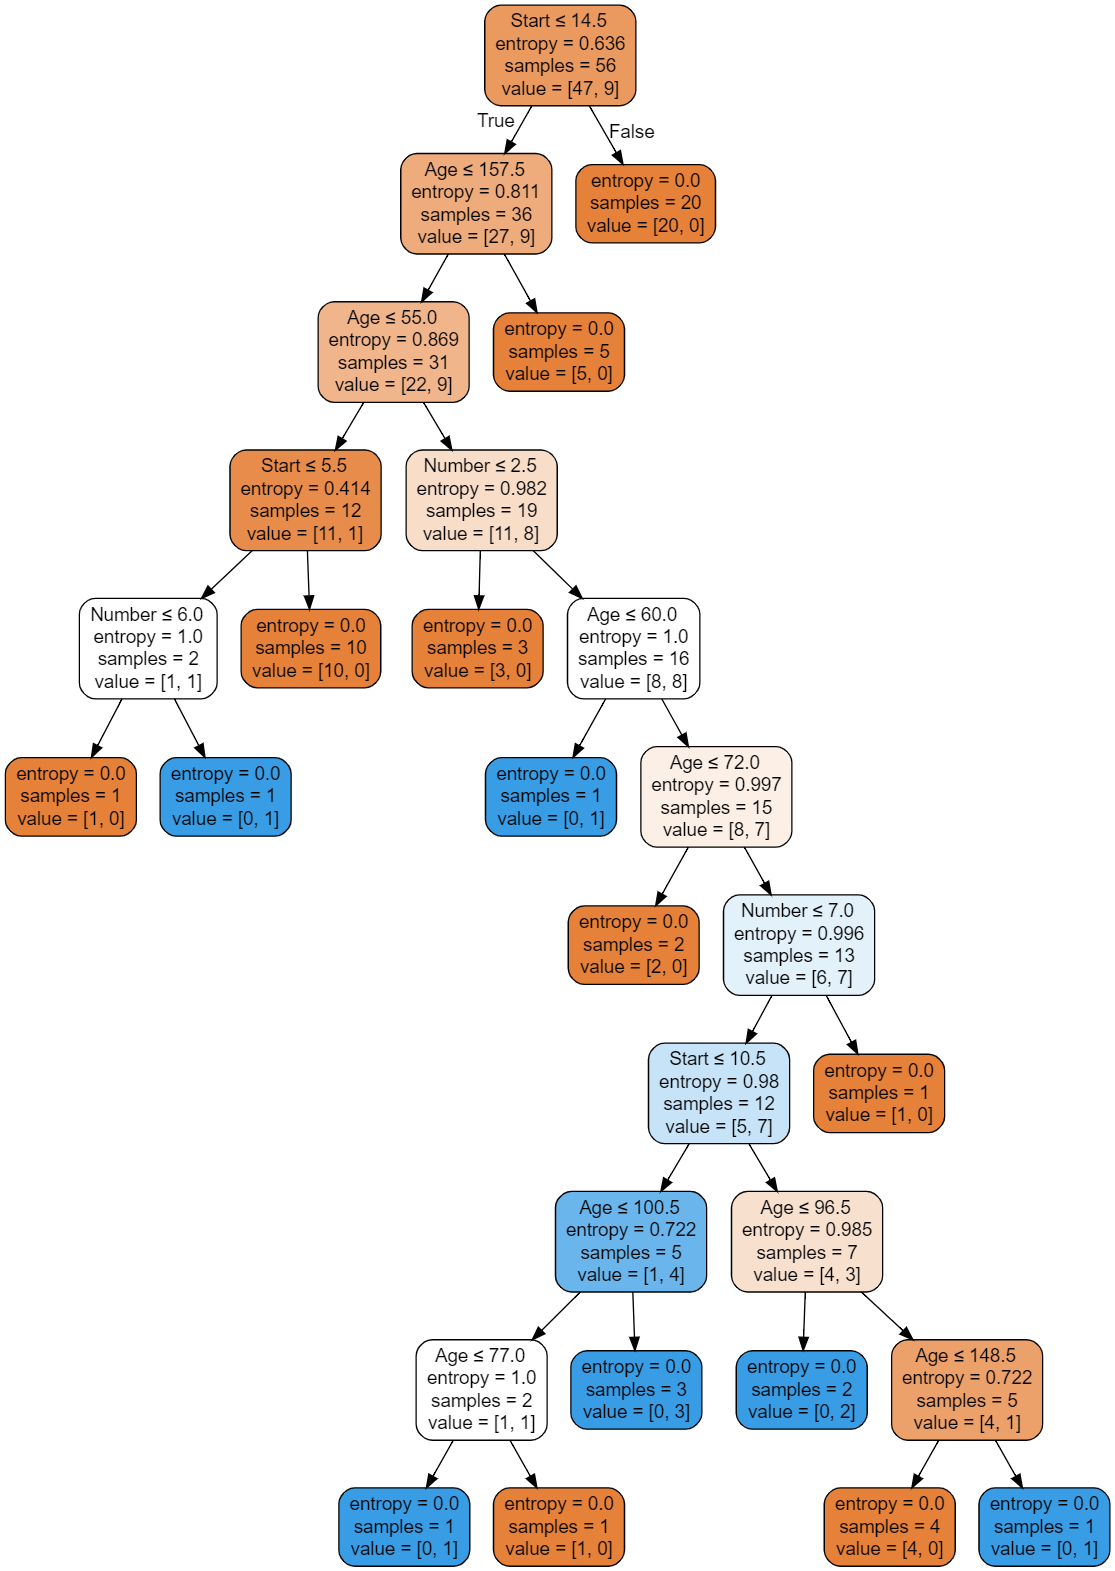

In [45]:
Image(filename='graphviz_entro_kypho.png')

## Tree Viz Gini

In [46]:
export_graphviz(dt_gini, out_file='gini_kypho.dot',
               filled=True, rounded=True, feature_names = X.columns, special_characters=True)

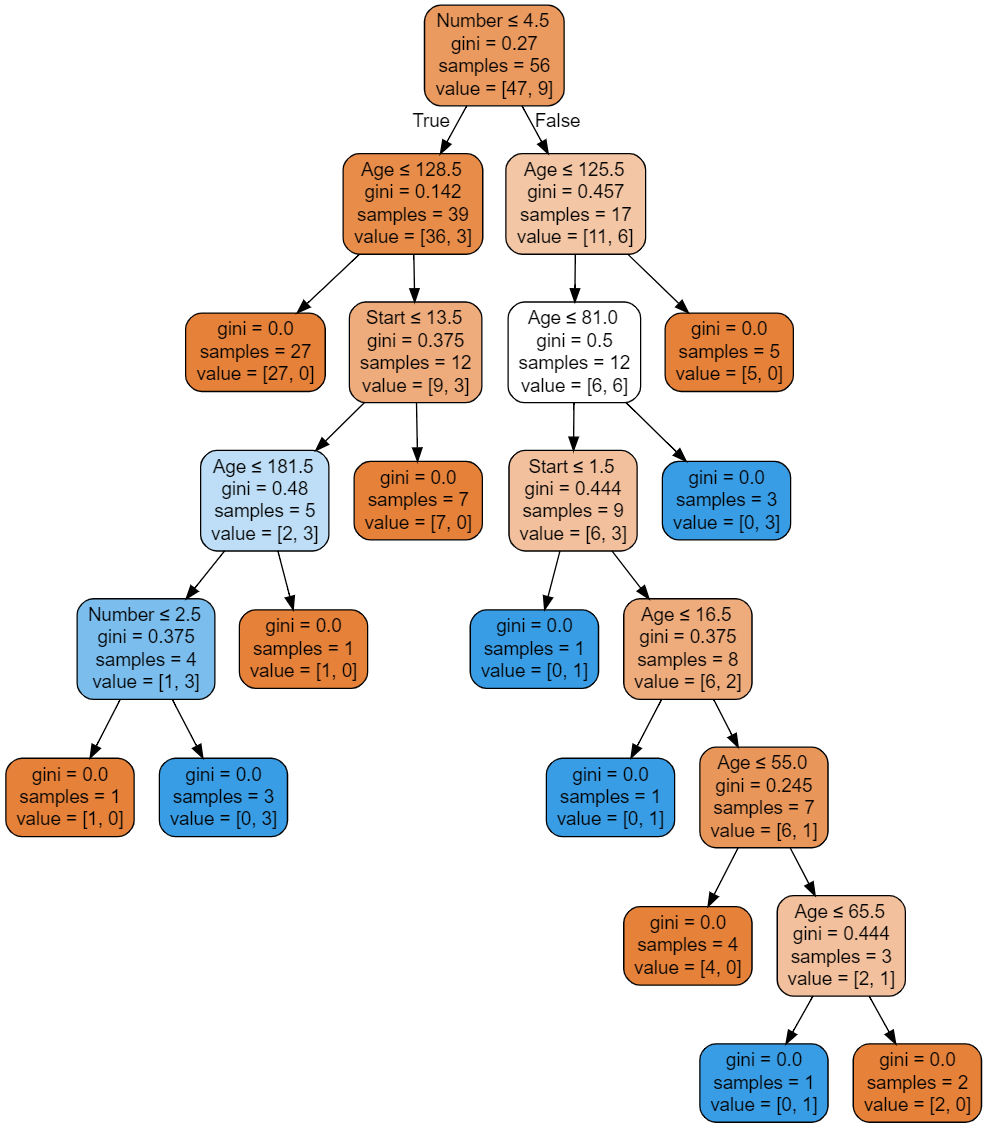

In [47]:
Image(filename='graphviz_gini_kypho.png')

## Decision Tree Regressor
* Hanya untuk kasus Regresi
* https://www.youtube.com/watch?v=g9c66TUylZ4

In [48]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
data = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
target = pd.Series(boston['target'])

In [49]:
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [50]:
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(data,target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
export_graphviz(dt_gini, out_file='dt_regressor.dot',
               filled=True, rounded=True, feature_names = X.columns, special_characters=True)

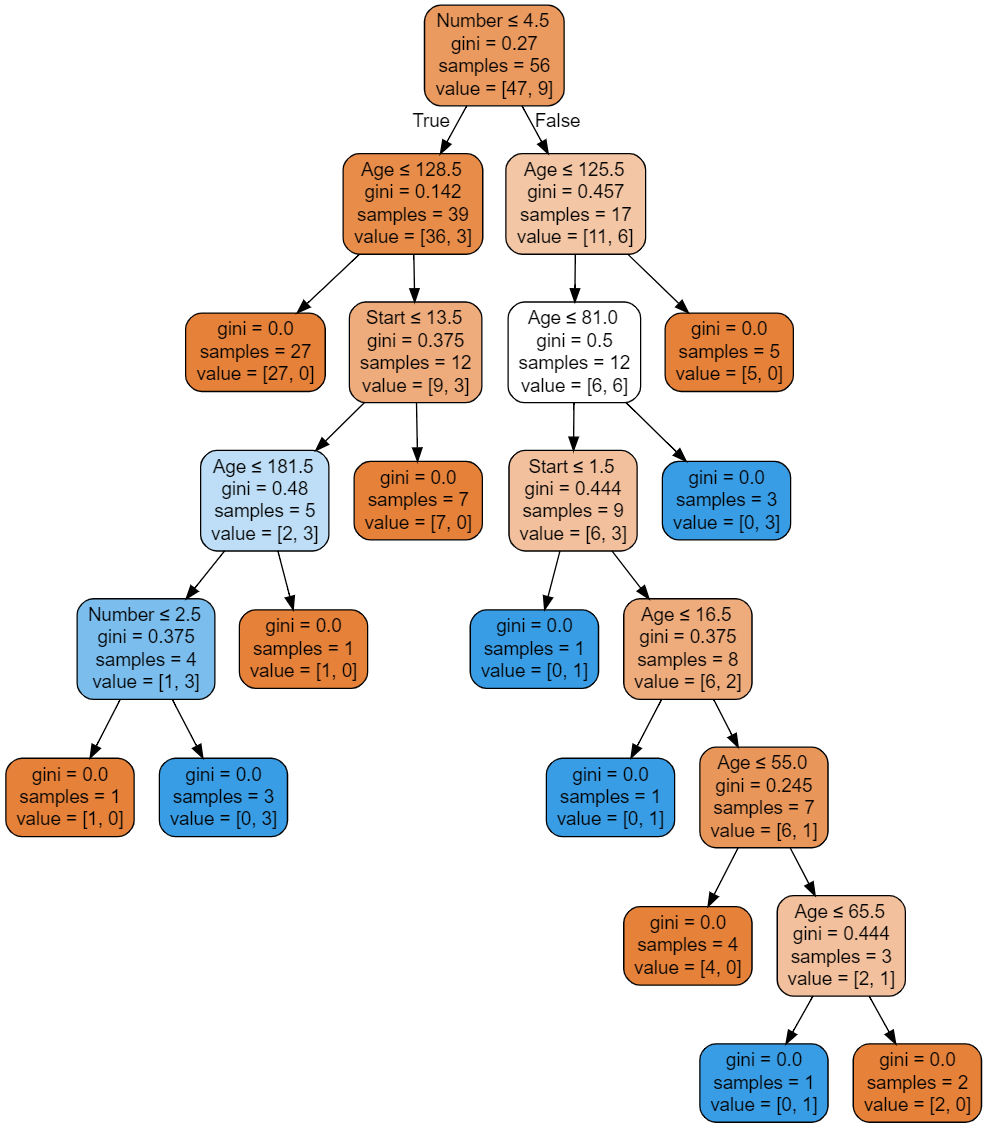

In [52]:
Image(filename='graphviz _dt_regressor.png')

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
pred = dt_reg.predict(data)
rmse = np.sqrt(mean_squared_error(target, pred))
r2 = r2_score(target, pred)

In [54]:
rmse

3.9219738648194213

In [55]:
r2

0.8177924678036443

In [56]:
# Jika menggunakan model DT Regressor Score metricnya jelek

# Random Forest

Random Forest, as its name stated is analyze by random sub-sample from the dataset (by bootstrap sample or not) to create a lot of decision tree and creating an ensemble method. 

There are 2 level of randomness in the Random Forest; Row level and Column level. In each decision tree, the sub-sample is n number of row (if bootstrap then the same row could be selected again). After that at each node, the columns is randomly selected as many as sqrt(number of columns).

In [57]:
from sklearn.ensemble import RandomForestClassifier
#oob_score hrs sama dgn bootstrap
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto', oob_score=True,random_state=42)

#train using random forest classifier
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

In [59]:
rfc.classes_

array([0, 1], dtype=int64)

In [60]:
rfc.n_features_

3

In [61]:
rfc.oob_score_

0.8214285714285714

In [62]:
# Predict
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [63]:
#Predict Probabilities
rfc_proba = rfc.predict_proba(X_test)
rfc_proba

array([[1.  , 0.  ],
       [0.45, 0.55],
       [0.41, 0.59],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.72, 0.28],
       [0.85, 0.15],
       [0.85, 0.15],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.69, 0.31],
       [0.58, 0.42],
       [0.92, 0.08],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.76, 0.24],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.62, 0.38],
       [0.82, 0.18]])

In [64]:
print(confusion_matrix(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


In [65]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



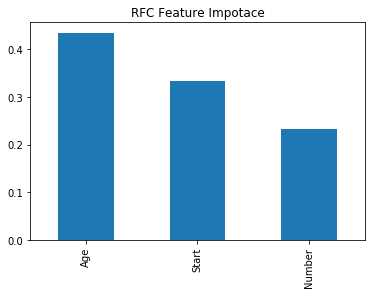

In [66]:
#feature importance

coef_rfc = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_rfc.plot(kind='bar', title='RFC Feature Impotace')

In [67]:
#Menghitung ROC AUC dari DECISION TREE ENTROPY
probento1 = entro_prob[:,1]
fpr_en1, tpr_en1, threshold_en1 = roc_curve(y_test, probento1)
roc_auc_en1 = auc(fpr_en1,tpr_en1)

In [68]:
#Menghitung ROC AUC dari DECISION TREE GINI IMPURITIES
probgini1 = gini_prob[:,1]
fpr_gi1, tpr_gi1, threshold_gi1 = roc_curve(y_test, probgini1)
roc_auc_gi1 = auc(fpr_gi1,tpr_gi1)

In [69]:
#Menghitung ROC AUC dari RANDOM FOREST GINI
probrfc1 = rfc_proba[:,1]
fpr_rf1, tpr_rf1, threshold_rf1 = roc_curve(y_test, probrfc1)
roc_auc_rf1 = auc(fpr_rf1,tpr_rf1)

In [70]:
import matplotlib.pyplot as plt

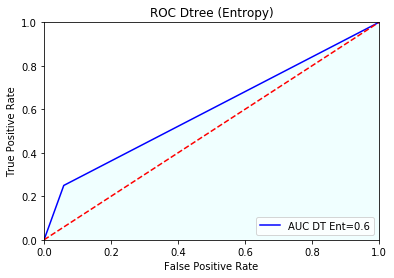

In [71]:
plt.title('ROC Dtree (Entropy)')

plt.plot(fpr_en1, tpr_en1, 'blue', label='AUC DT Ent={}'.format(round(roc_auc_en1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_en1,tpr_en1, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

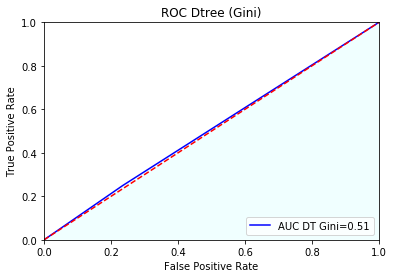

In [72]:
plt.title('ROC Dtree (Gini)')

plt.plot(fpr_gi1, tpr_gi1, 'blue', label='AUC DT Gini={}'.format(round(roc_auc_gi1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gi1,tpr_gi1, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

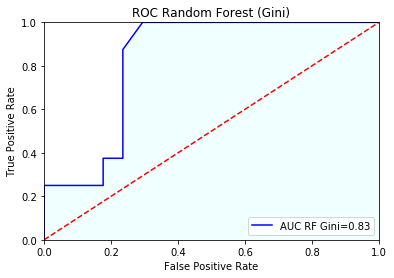

In [73]:
plt.title('ROC Random Forest (Gini)')

plt.plot(fpr_rf1, tpr_rf1, 'blue', label='AUC RF Gini={}'.format(round(roc_auc_rf1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf1,tpr_rf1, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

### Resampling/balancing data train Using SMOTE

In [74]:
#KARENA TD DATASET TRAINNYA IMBALANCED, maka kita lakukan oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train,y_train)

In [75]:
len(Xsmot_train)

94

In [76]:
len(X_train)

56

In [77]:
ysmot_train.value_counts() # sdh balance

1    47
0    47
Name: Kyphosis, dtype: int64

In [78]:
y_train.value_counts() # sblm di SMOTE gak balance

0    47
1     9
Name: Kyphosis, dtype: int64

In [79]:
#Train using dataset Train yg sudah di balancing dgn SMOTE
rfcsmot = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto',oob_score=True, random_state=42)
rfcsmot.fit(Xsmot_train,ysmot_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [80]:
#Predict
rfcsmot_pred = rfcsmot.predict(X_test)
rfcsmot_prob = rfcsmot.predict_proba(X_test)

In [81]:
rfcsmot_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [82]:
rfcsmot_prob

array([[0.99, 0.01],
       [0.29, 0.71],
       [0.09, 0.91],
       [0.72, 0.28],
       [0.99, 0.01],
       [0.87, 0.13],
       [0.66, 0.34],
       [0.62, 0.38],
       [0.41, 0.59],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.15, 0.85],
       [0.77, 0.23],
       [0.67, 0.33],
       [0.91, 0.09],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.39, 0.61],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.06, 0.94],
       [0.53, 0.47],
       [0.27, 0.73],
       [0.4 , 0.6 ]])

In [83]:
print(confusion_matrix(y_test,rfcsmot_pred))

[[16  1]
 [ 1  7]]


In [84]:
print(classification_report(y_test,rfcsmot_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.88      0.88         8

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



In [85]:
#Menghitung ROC AUC dari RANDOM FOREST GINI
rfcsmot_prob = rfcsmot_prob[:,1]
fpr_rf_smot, tpr_rf_smot, threshold_rf_smot = roc_curve(y_test, rfcsmot_prob)
roc_auc_rf_smot = auc(fpr_rf_smot,tpr_rf_smot)

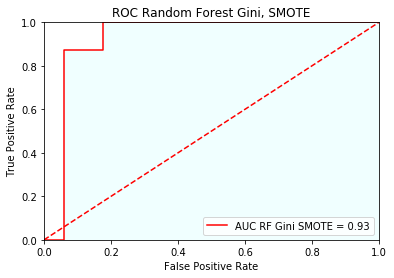

In [88]:
plt.title('ROC Random Forest Gini, SMOTE')

plt.plot(fpr_rf_smot, tpr_rf_smot, 'red', label='AUC RF Gini SMOTE = {}'.format(round(roc_auc_rf_smot,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf_smot,tpr_rf_smot, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

In [87]:
#Area Under the Curve(AUC)nya sangat baik = 0.93 / 93%

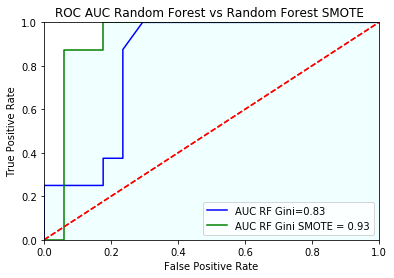

In [91]:
plt.title('ROC AUC Random Forest vs Random Forest SMOTE ')

#RFC GINI
plt.plot(fpr_rf1, tpr_rf1, 'blue', label='AUC RF Gini={}'.format(round(roc_auc_rf1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf1,tpr_rf1, 0, facecolor='azure', alpha=1)

#SMOTE(GINI)
plt.plot(fpr_rf_smot, tpr_rf_smot, 'green', label='AUC RF Gini SMOTE = {}'.format(round(roc_auc_rf_smot,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf_smot,tpr_rf_smot, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

# TOOLS

## K-Fold Validation

In [92]:
from sklearn.model_selection import KFold

In [93]:
kf = KFold(n_splits=8, random_state=42, shuffle=True)
kf.get_n_splits(X)

8

In [98]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [97]:
#indeks mana aja yg dipanggil setiap fold
fold = 0
for train_index, test_index in kf.split(Xsmot_train) :
    fold += 1
    print(fold)
    print('TRAIN:', train_index, '\nTEST:', test_index)

1
TRAIN: [ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 27
 28 29 30 31 32 33 34 36 37 38 41 42 43 45 46 47 48 49 50 51 52 53 54 56
 57 58 59 60 61 62 63 64 65 66 68 69 70 71 73 74 75 76 77 78 79 80 81 82
 84 85 86 87 88 89 90 91 92 93] 
TEST: [ 0 10 22 26 35 39 40 44 55 67 72 83]
2
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13 14 16 17 19 20 21 22 23 24 25 26 27
 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56 57 58 59 60 61 63 64 66 67 69 70 71 72 73 74 75 76 77 79 80 81 82
 83 84 85 86 87 88 89 91 92 93] 
TEST: [ 4 12 15 18 28 30 49 62 65 68 78 90]
3
TRAIN: [ 0  1  2  3  4  6  7  8 10 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 32 34 35 36 37 38 39 40 41 43 44 45 46 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 67 68 71 72 73 74 75 76 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93] 
TEST: [ 5  9 11 16 31 33 42 47 66 69 70 77]
4
TRAIN: [ 0  1  2  4  5  6  8  9 10 11 12 14 15 16 17 18 20 21 22 23 26 28 29 30
 31

In [110]:
#pgn tau model SMOTE td stabil/tidak
#function untuk menghitung metrics eval dari rfcsmot
def KScore (model, xtr, xts, ytr, yts):
    model.fit(xtr, ytr)
    pred = model.predict(xts)
    return [model.oob_score_, accuracy_score(yts, pred)] #oob score dimunculkan krn model ini mgkn oobscore

In [100]:
Xsmot_train

,Age,Number,Start
0,11,3,15
1,140,4,15
2,158,3,14
3,127,4,12
4,139,3,10
...,...,...,...
89,101,4,8
90,35,6,6
91,136,3,9
92,61,5,9


In [101]:
ysmot_train

0     0
1     0
2     0
3     0
4     1
     ..
89    1
90    1
91    1
92    1
93    1
Name: Kyphosis, Length: 94, dtype: int64

In [111]:
xysmot = pd.concat([Xsmot_train, ysmot_train], axis = 1)

score = list()
for train_index, test_index in kf.split(xysmot):
    Xk_train = xysmot.iloc[train_index][['Age', 'Number', 'Start']]
    Xk_test = xysmot.iloc[test_index][['Age', 'Number', 'Start']]
    yk_train = xysmot.iloc[train_index]['Kyphosis']
    yk_test = xysmot.iloc[test_index]['Kyphosis']
    #print(Xk_test)
    score.append(KScore(rfcsmot, Xk_train, Xk_test, yk_train, yk_test))
score

[[0.8292682926829268, 0.8333333333333334],
 [0.8048780487804879, 0.9166666666666666],
 [0.8780487804878049, 0.6666666666666666],
 [0.8536585365853658, 0.8333333333333334],
 [0.8536585365853658, 0.75],
 [0.8048780487804879, 1.0],
 [0.8072289156626506, 1.0],
 [0.8433734939759037, 0.8181818181818182]]

In [ ]:
# index 0 : oob score
# index 1 : Accuracy Score

# hasil di atas, kita bisa tahu fold mana yg scorenya plg bagus, lalu kita ambil indexnya.
# lalu kita train_test_split secara manual menggunaakn index tadi.
# lalu di fitting menggunakan rfcsmot

In [115]:
kfold_df = pd.DataFrame(score, columns=['OOB Score', 'Accuracy Score'], index=list(range(1,9)))
#index ngikutin foldya, supaya rapih seragam
kfold_df

,OOB Score,Accuracy Score
1,0.829268,0.833333
2,0.804878,0.916667
3,0.878049,0.666667
4,0.853659,0.833333
5,0.853659,0.750000
6,0.804878,1.000000
7,0.807229,1.000000
8,0.843373,0.818182


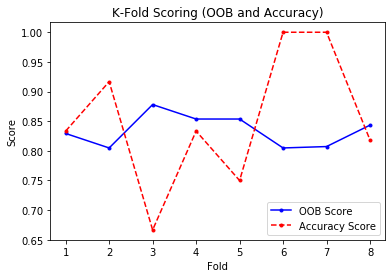

In [116]:
plt.title('K-Fold Scoring (OOB and Accuracy)')

plt.plot(kfold_df.index, kfold_df['OOB Score'], 'b.-', label='OOB Score')
plt.plot(kfold_df.index, kfold_df['Accuracy Score'], 'r.--', label='Accuracy Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid
plt.show()

## Grid Search Validation
https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d

In [117]:
RandomForestClassifier() #punya hyper parameter lbh dari 10

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
#Mencarikan hyper parameter beserta estimator nya. kita pilih yg pny score terbaik

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
rfc = RandomForestClassifier()

In [123]:
param_grid = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10,15,20],
    'min_samples_split' : [2,3,10,20],
    'n_estimators' : [100,200]
}
grid_search = GridSearchCV(estimator=rfc,  param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train) #coba yg sblm di resampling, apakah mampu mengalahkan rfc smote


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
#pgn tau best parameter
grid_search.best_params_
# ini lah parameter yg digunakan grid search untuk menemukan hasil terbaik

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [125]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
rfc_grid = grid_search.best_estimator_

In [127]:
#pake X_train
grid_pred = rfc_grid.predict(X_test)
grid_proba = rfc_grid.predict_proba(X_test)

In [130]:
grid_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [129]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [161]:
#ROC AUC grid search using dataset train sblm SMOTE
probrfcgrid = grid_proba[:,-1]
fpr_grid1, tpr_grid1, threshold_grid1 = roc_curve(y_test, probrfcgrid)
roc_auc_grid1 = auc(fpr_grid1, tpr_grid1)

In [132]:
#Cari grid search tp train dgn Xsmot
grid_smot = GridSearchCV(estimator=rfc,  param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_smot.fit(Xsmot_train, ysmot_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [133]:
grid_smot.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

In [160]:
#coba lihat & bandingkan dgn grid serach menggunakan  dataset sblm SMOTE
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [136]:
rfc_grid_smot = grid_smot.best_estimator_

In [137]:
grid_smot_pred = rfc_grid_smot.predict(X_test)
grid_smot_proba = rfc_grid_smot.predict_proba(X_test)

In [138]:
print(classification_report(y_test, grid_smot_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.75      0.75      0.75         8

    accuracy                           0.84        25
   macro avg       0.82      0.82      0.82        25
weighted avg       0.84      0.84      0.84        25



In [139]:
print(confusion_matrix(y_test, grid_smot_pred))

[[15  2]
 [ 2  6]]


In [141]:
probgridsmot = grid_smot_proba[:,1]
fpr_gridsm1, tpr_gridsm1, threshold_gridsm1 = roc_curve(y_test, probgridsmot)
roc_auc_gridsm1 = auc(fpr_gridsm1, tpr_gridsm1)

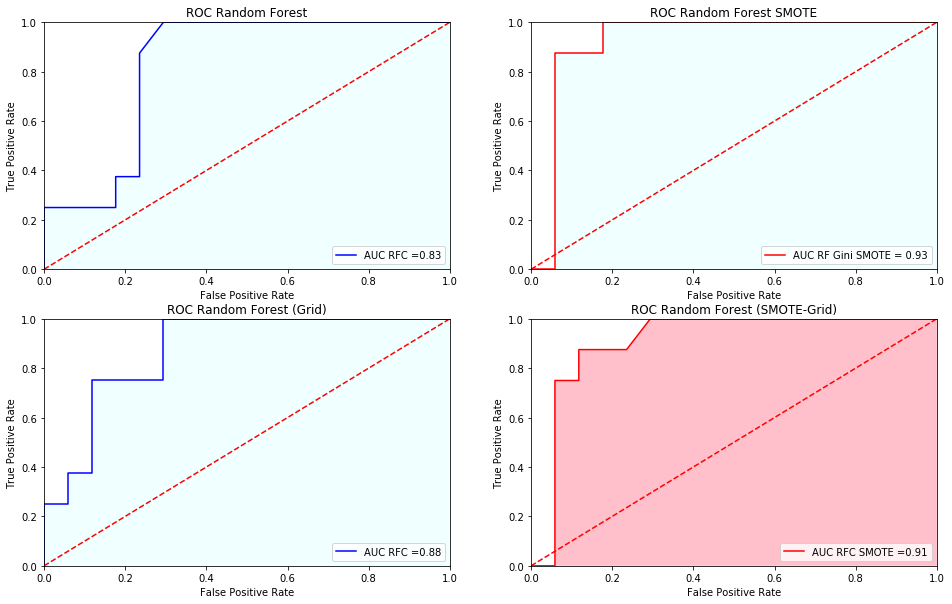

In [163]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Random Forest')
plt.plot(fpr_rf1, tpr_rf1, 'blue', label='AUC RFC ={}'.format(round(roc_auc_rf1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf1, tpr_rf1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Random Forest SMOTE')
plt.plot(fpr_rf_smot, tpr_rf_smot, 'red', label='AUC RF Gini SMOTE = {}'.format(round(roc_auc_rf_smot,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rf_smot,tpr_rf_smot, 0, facecolor='azure', alpha=1)
plt.legend(loc = 'lower right')

plt.subplot(223)
plt.title('ROC Random Forest (Grid)')
plt.plot(fpr_grid1, tpr_grid1, 'blue', label='AUC RFC ={}'.format(round(roc_auc_grid1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_grid1, tpr_grid1, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(224)
plt.title('ROC Random Forest (SMOTE-Grid)')
plt.plot(fpr_gridsm1, tpr_gridsm1, 'red', label='AUC RFC SMOTE ={}'.format(round(roc_auc_gridsm1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gridsm1, tpr_gridsm1, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')


## Randomized Search CV (Cross Validation)

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:
random_grid = {
    # n_estimators = jumlah decision trees
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    # Number of features
    'max_features': ['auto', 'sqrt'],
    # kedalaman pohon
    'max_depth': [int(x) for x in np.linspace(start=10,stop=110,num=11)],
    # minimum sample untuk di-split
    'min_samples_split': [int(x) for x in np.linspace(start=100, stop=1000, num=100)],
    # bootstrap
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator= rfcsmot,
                              param_distributions= random_grid,
                              n_iter=10, cv=3, n_jobs=-1, scoring='accuracy')
rf_random.fit(Xsmot_train, ysmot_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [165]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 472,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [166]:
rfc_rand = rf_random.best_estimator_

In [167]:
rand_pred = rfc_rand.predict(X_test)
rand_proba = rfc_rand.predict_proba(X_test)

In [168]:
rand_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [169]:
print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
probrandsmot = rand_proba[:,1]
fpr_randsm1, tpr_randsm1, threshold_randsm1 = roc_curve(y_test, probrandsmot)
roc_auc_randsm1 = auc(fpr_randsm1, tpr_randsm1)

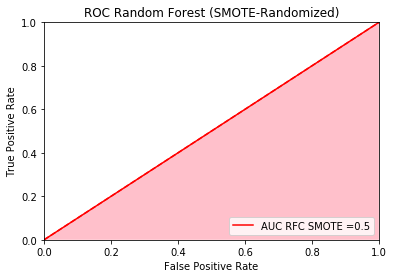

In [175]:
plt.title('ROC Random Forest (SMOTE-Randomized)')
plt.plot(fpr_randsm1, tpr_randsm1, 'red', label='AUC RFC SMOTE ={}'.format(round(roc_auc_randsm1,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_randsm1, tpr_randsm1, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

In [ ]:
#Ternyata hasilnya lbh jelak dari Random Fores SMOTE yg hyper parameternya default

## Feature Importances - Permutation Importance
- Data School How To Deal With Feature Selection: https://www.youtube.com/watch?v=YaKMeAlHgqQ
- Permutation Feature Importance: https://docs.microsoft.com/en-us/archive/blogs/machinelearning/permutation-feature-importance

In [156]:
#cara mematikan notif warning(kotak pink)
# import warnings
# warnings.filterwarnings('ignore')

from eli5 import show_weights
from eli5.sklearn import PermutationImportance

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [158]:
rfc.fit(X_train, y_train)
perm = PermutationImportance(rfc, scoring='accuracy', random_state=42).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0640 ± 0.0816,Age
0.0400 ± 0.0506,Start
0.0160 ± 0.1085,Number


In [159]:
perm = PermutationImportance(rfcsmot, scoring='accuracy', random_state=42).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns)) #jika menggunakan smot, yg plg signifikan = 'Start'

Weight,Feature
0.1760 ± 0.1866,Start
0.1600 ± 0.1131,Age
0.0720 ± 0.1466,Number
